In [1]:
import glob
import matplotlib as mpl
import matplotlib.pyplot as plt  # PLOTTING LIBRARY
import numpy as np #NUMPY MATRIXES
import os.path
import pandas as pd #DATA FRAME LIKE EXCEL
import sklearn
from sklearn.mixture import GaussianMixture as GMM
import seaborn as sns #FANCY PLOTTING
from scipy import stats
from scipy.stats import norm
from scipy.optimize import curve_fit

from multiprocess import Pool

sns.set() #SEABORN DEFAULTS
%matplotlib inline
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams.update({'font.size': 15, 'font.family': 'Arial'})



folder_path1 = "XB2 CSV"
folder_path2 = "XB4 CSV"

# List all files in the folders

file_paths1 = glob.glob(os.path.join(folder_path1, '*.csv'))
file_paths2 = glob.glob(os.path.join(folder_path2, '*.csv'))
filecount1 = int(len(file_paths1))
filecount2 = int(len(file_paths2))
filecountT = filecount1+filecount2
print(filecountT)
print(file_paths1)
print(file_paths2)


130
['XB2 CSV/037_g12 100_events.csv', 'XB2 CSV/014_g7 50_events.csv', 'XB2 CSV/061_g19 100_events.csv', 'XB2 CSV/004_g10 0_events.csv', 'XB2 CSV/036_g12 75_events.csv', 'XB2 CSV/032_g11 75_events.csv', 'XB2 CSV/048_g15 75_events.csv', 'XB2 CSV/026_g10 25_events.csv', 'XB2 CSV/056_g18 75_events.csv', 'XB2 CSV/049_g15 100_events.csv', 'XB2 CSV/044_g14 75_events.csv', 'XB2 CSV/010_g16 0_events.csv', 'XB2 CSV/008_g14 0_events.csv', 'XB2 CSV/012_g19 0_events.csv', 'XB2 CSV/013_g7 25_events.csv', 'XB2 CSV/019_g8 50_events.csv', 'XB2 CSV/063_g20 50_events.csv', 'XB2 CSV/065_g20 100_events.csv', 'XB2 CSV/050_g16 25_events.csv', 'XB2 CSV/020_g8 75_events.csv', 'XB2 CSV/057_g18 100_events.csv', 'XB2 CSV/011_g17 0_events.csv', 'XB2 CSV/009_g15 0_events.csv', 'XB2 CSV/029_g10 100_events.csv', 'XB2 CSV/052_g16 75_events.csv', 'XB2 CSV/042_g14 25 _events.csv', 'XB2 CSV/034_g12 25_events.csv', 'XB2 CSV/030_g11 25_events.csv', 'XB2 CSV/047_g15 50_events.csv', 'XB2 CSV/058_g19 25_events.csv', 'XB2 CSV

In [2]:
dfs1 = []
for path in file_paths1:
    # Extract the file name from the path
    file_name = os.path.basename(path)
    file_name_without_extension = os.path.splitext(file_name)[0]
    data = pd.read_csv(path, comment="#", encoding="ISO8859-1")
    data['filename'] = file_name
    tok = file_name.split()
    if len(tok) >= 2:
        # Assuming the second part contains concentration info
        data['conc (nM)'] = float(tok[1].split("_")[0])
        
    else:
        # Handle the case when there isn't enough info
        data['conc (nM)'] = None
    
    if len(tok) >= 1:
        # Assuming the first part contains construct info
        data['construct'] = tok[0][4:]

    else:
        # Handle the case when there isn't enough info
        data['construct'] = None
    if 'masses_kDa' not in data:
        print(file_name)
    dfs1.append(data[['masses_kDa','conc (nM)','construct']])

In [3]:
dfs2 = []
for path in file_paths2:
    # Extract the file name from the path
    file_name = os.path.basename(path)
    file_name_without_extension = os.path.splitext(file_name)[0]
    data = pd.read_csv(path, comment="#", encoding="ISO8859-1")
    data['filename'] = file_name
    tok = file_name.split()
    if len(tok) >= 2:
        # Assuming the second part contains concentration info
        data['conc (nM)'] = float(tok[1].split("_")[0])
        
    else:
        # Handle the case when there isn't enough info
        data['conc (nM)'] = None
    
    if len(tok) >= 1:
        # Assuming the first part contains construct info
        data['construct'] = tok[0][4:]

    else:
        # Handle the case when there isn't enough info
        data['construct'] = None
    if 'masses_kDa' not in data:
        print(file_name)
    dfs2.append(data[['masses_kDa','conc (nM)','construct']])

In [4]:
dfs2[0]

,masses_kDa,conc (nM),construct
0,464.278661,0.0,g20
1,484.397773,0.0,g20
2,336.354991,0.0,g20
3,412.477710,0.0,g20
4,297.293446,0.0,g20
...,...,...,...
31816,390.120756,0.0,g20
31817,484.446785,0.0,g20
31818,370.724390,0.0,g20
31819,383.375981,0.0,g20


In [5]:
#Creates list of runs in data frame, indexs are the position of run in dfs
runs1 = []
for x in range(filecount1):

    constring = str(dfs1[x].iloc[x][['construct']])
    construct = constring.split()
   
    conc = str(dfs1[x].iloc[x][['conc (nM)']]).split()
    
    run = construct[1]+" "+conc[2][:-2]
    runs1.append(run)
print(runs1)


['g12 100', 'g7 50', 'g19 100', 'g10 0', 'g12 75', 'g11 75', 'g15 75', 'g10 25', 'g18 75', 'g15 100', 'g14 75', 'g16 0', 'g14 0', 'g19 0', 'g7 25', 'g8 50', 'g20 50', 'g20 100', 'g16 25', 'g8 75', 'g18 100', 'g17 0', 'g15 0', 'g10 100', 'g16 75', 'g14 25', 'g12 25', 'g11 25', 'g15 50', 'g19 25', 'g17 50', 'g12 0', 'g18 25', 'g11 0', 'g9 25', 'g19 50', 'g17 25', 'g12 50', 'g10 75', 'g11 50', 'g15 25', 'g18 50', 'g20 75', 'g8 0', 'g7 0', 'g7 100', 'g8 25', 'g7 75', 'g19 75', 'g14 50', 'g16 100', 'g17 75', 'g16 50', 'g14 100', 'g20 25', 'g20 0', 'g9 100', 'g18 0', 'g8 100', 'g9 0', 'g9 75', 'g11 100', 'g17 100', 'g9 50', 'g10 50']


In [6]:
#Creates list of runs in data frame, indexs are the position of run in dfs
runs2 = []
for x in range(filecount2):

    constring = str(dfs2[x].iloc[x][['construct']])
    construct = constring.split()
   
    conc = str(dfs2[x].iloc[x][['conc (nM)']]).split()
    
    run = construct[1]+" "+conc[2][:-2]
    runs2.append(run)
print(runs2)


['g20 0', 'g12 100', 'g15 75', 'g12 25', 'g16 50', 'g14 25', 'g18 0', 'g14 50', 'g16 0', 'g14 0', 'g10 25', 'g17 25', 'g18 50', 'g7 100', 'g11 75', 'g20 50', 'g14 100', 'g17 0', 'g15 0', 'g17 75', 'g10 100', 'g15 25', 'g16 25', 'g8 50', 'g19 100', 'g9 25', 'g7 75', 'g9 50', 'g10 75', 'g8 25', 'g12 0', 'g19 0', 'g17 100', 'g12 75', 'g20 100', 'g19 50', 'g11 0', 'g18 100', 'g8 0', 'g20 75', 'g17 50', 'g19 25', 'g18 25', 'g12 50', 'g7 0', 'g19 75', 'g11 25', 'g8 100', 'g10 50', 'g10 0', 'g15 50', 'g16 75', 'g20 25', 'g15 100', 'g14 75', 'g9 0', 'g18 75', 'g11 100', 'g7 50', 'g9 75', 'g11 50', 'g16 100', 'g9 100', 'g8 75', 'g7 25']


In [7]:
    # Define the order of prefixes
    order = ['g7', 'g8', 'g9', 'g10', 'g11', 'g12', 'g13', 'g14', 'g15', 'g16', 'g17', 'g18', 'g19', 'g20']

    # Sort the list based on the order of prefixes and then by the run number
    sorted_runs1 = sorted(runs1, key=lambda x: (order.index(x.split()[0]), int(x.split()[1])))
    print(sorted_runs1)
    
    sorted_runs2 = sorted(runs2, key=lambda x: (order.index(x.split()[0]), int(x.split()[1])))
    print(sorted_runs2)

['g7 0', 'g7 25', 'g7 50', 'g7 75', 'g7 100', 'g8 0', 'g8 25', 'g8 50', 'g8 75', 'g8 100', 'g9 0', 'g9 25', 'g9 50', 'g9 75', 'g9 100', 'g10 0', 'g10 25', 'g10 50', 'g10 75', 'g10 100', 'g11 0', 'g11 25', 'g11 50', 'g11 75', 'g11 100', 'g12 0', 'g12 25', 'g12 50', 'g12 75', 'g12 100', 'g14 0', 'g14 25', 'g14 50', 'g14 75', 'g14 100', 'g15 0', 'g15 25', 'g15 50', 'g15 75', 'g15 100', 'g16 0', 'g16 25', 'g16 50', 'g16 75', 'g16 100', 'g17 0', 'g17 25', 'g17 50', 'g17 75', 'g17 100', 'g18 0', 'g18 25', 'g18 50', 'g18 75', 'g18 100', 'g19 0', 'g19 25', 'g19 50', 'g19 75', 'g19 100', 'g20 0', 'g20 25', 'g20 50', 'g20 75', 'g20 100']
['g7 0', 'g7 25', 'g7 50', 'g7 75', 'g7 100', 'g8 0', 'g8 25', 'g8 50', 'g8 75', 'g8 100', 'g9 0', 'g9 25', 'g9 50', 'g9 75', 'g9 100', 'g10 0', 'g10 25', 'g10 50', 'g10 75', 'g10 100', 'g11 0', 'g11 25', 'g11 50', 'g11 75', 'g11 100', 'g12 0', 'g12 25', 'g12 50', 'g12 75', 'g12 100', 'g14 0', 'g14 25', 'g14 50', 'g14 75', 'g14 100', 'g15 0', 'g15 25', 'g15 50',

In [8]:
MutMap =  {
    'g7': 'WT',
    'g8': 'Q115K',
    'g9': 'T167I',
    'g10': 'A222M',
    'g11': 'N234T',
    'g12': 'N405A',
    'g13': 'A570D',
    'g14': 'Q762L',
    'g15': 'F1121L',
    'g16': 'R498V',
    'g17': 'Q804L',
    'g18': 'Q493L',
    'g19': 'G614D',
    'g20': 'F371N',
}

In [9]:
n_dict={
  "g7 0": 4, "g7 25": 4, "g7 50": 4, "g7 75": 4, "g7 100": 4,
  "g8 0": 4, "g8 25": 4, "g8 50": 4, "g8 75": 4, "g8 100": 4,
  "g9 0": 4, "g9 25": 4, "g9 50": 4, "g9 75": 4, "g9 100": 4,
  "g10 0": 4, "g10 25": 4, "g10 50": 4, "g10 75": 4, "g10 100": 4,
  "g11 0": 4, "g11 25": 2, "g11 50": 2, "g11 75": 3, "g11 100": 3,
  "g12 0": 4, "g12 25": 4, "g12 50": 4, "g12 75": 4, "g12 100": 4,
  "g13 0": 4, "g13 25": 4, "g13 50": 4, "g13 75": 4, "g13 100": 4,
  "g14 0": 4, "g14 25": 4, "g14 50": 4, "g14 75": 4, "g14 100": 4,
  "g15 0": 4, "g15 25": 3, "g15 50": 4, "g15 75": 4, "g15 100": 4,
  "g16 0": 4, "g16 25": 2, "g16 50": 2, "g16 75": 2, "g16 100": 2,
  "g17 0": 4, "g17 25": 2, "g17 50": 4, "g17 75": 4, "g17 100": 4,
  "g18 0": 4, "g18 25": 4, "g18 50": 4, "g18 75": 4, "g18 100": 4,
  "g19 0": 4, "g19 25": 2, "g19 50": 2, "g19 75": 4, "g19 100": 4,
  "g20 0": 4, "g20 25": 4, "g20 50": 4, "g20 75": 4, "g20 100": 4
}

In [10]:
def protein(run):
    x = run.split(" ")
    spike=MutMap[x[0]]
    ACE2=x[1]
    return spike, ACE2

def maxmin(run, spike): 
    x = run.split(" ")
    ACE2=x[1]
    if ACE2 == '0':
        label = str('XBB.1.5 S '+spike+' + '+x[1]+'nM hACE2')
        hmin = 0
        hmax = 1600
    else:
        label = str('XBB.1.5 S '+spike+' + '+x[1]+'nM hACE2')
        hmin = 350
        hmax = 1650
    return label, hmin, hmax

In [11]:
def fit(data_to_fit, label, hmin, hmax, run):
        
        import numpy as np
        from sklearn.mixture import GaussianMixture as GMM
        from scipy.stats import norm
        
    
        x = data_to_fit[(data_to_fit >= (hmin+50)) & (data_to_fit <= hmax-350)].values.reshape(-1, 1)
        dx = data_to_fit[(data_to_fit >= (hmin)) & (data_to_fit <= hmax-50)].values.reshape(-1, 1)

        n_optimal=n_dict[run]
        
        # create GMM model object
        gmm = GMM(n_components = n_optimal, max_iter=1000, random_state=10, covariance_type = 'full',
                 n_init=10, tol=1e-6)

        gmm.fit(x)
        # find useful parameters
        mean = gmm.means_  
        covs  = gmm.covariances_
        weights = gmm.weights_
    
        x_axis = np.arange(hmin, hmax, .1)

        y_axes = []
       
        bwidth = 10
        bins = np.arange(hmin, hmax, bwidth)
        counts, hbins = np.histogram(dx, bins, density=False)
        normfactor = np.sum(counts) * bwidth
        
        for i in range(gmm.n_components):
            y_axes.append(norm.pdf(x_axis, float(mean[i][0]), np.sqrt(float(covs[i][0][0])))*weights[i]*normfactor)

        mean=mean.tolist()
        return label, counts, hbins, gmm, x_axis, y_axes, hmin, hmax, run, mean, weights
            

In [45]:
def plotfit(label, counts, hbins, gmm, x_axis, y_axes, hmin, hmax, run, mean, weights, ax):
        # create necessary things to plot
        #color = color_map[run[:2]]
        color = 'lightsteelblue'
        
        max_y = np.max(counts)

        if run != "g10 100":
            ax.stairs(counts, hbins, fill=True, color=color, alpha=0.4)
        
        if hmax==1600:
            for i in range(gmm.n_components):
                comp_mean=float(mean[i][0])
                peak_height = np.max(y_axes[i])
                if peak_height >= 0.5 * max_y:
                    if int(comp_mean) > 400:
                        ax.plot(x_axis, y_axes[i], lw=2, color=color, alpha=1)
        else:
            if run != "g10 100":
                for i in range(gmm.n_components):
                    comp_mean=float(mean[i][0])
                    #print(comp_mean)
                    peak_height = np.max(y_axes[i])
                    #if peak_height >= 0.05 * max_y:
                    if int(comp_mean) > 400:
                        ax.plot(x_axis, y_axes[i], lw=2, color=color, alpha=1)
        
        
        ax.set_facecolor('white')
        ax.figure.set_facecolor('white')
        ax.set_xlim((hmin, hmax))
        
        if run != "g10 100":
            
            ax.set_title(str(label), color='black', fontsize=12)
            ax.set_xlabel(r"Mass (kDa)", fontsize=10)
            ax.set_ylabel(r"Counts", fontsize=10)
            ax.tick_params(colors='black')

        ax.spines['bottom'].set_color('black')
        ax.spines['left'].set_color('black')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        
#         plt.subplots_adjust(wspace=0.3)
        #fig.savefig(os.path.join("figures", label + ".png"), dpi=600, bbox_inches='tight')
#         print(weights)
#         print(np.sum(weights))

In [13]:
def rungen(dfs1):
    
    
    for run in runs1:
        df_index = runs1.index(run)
        spike, ACE2 = protein(run)
        label, hmin, hmax = maxmin(run, spike)
        data_to_fit = dfs1[df_index]['masses_kDa']
        data_to_fit = pd.to_numeric(data_to_fit, errors='coerce').dropna()
        yield data_to_fit, label, hmin, hmax, run

inputs1 = [(data, label, hmin, hmax, run) for data, label, hmin, hmax, run in rungen(dfs1)]
 
def rungen(dfs2):
    for run in sorted_runs2:
        df_index = runs2.index(run)
        spike, ACE2 = protein(run)
        label, hmin, hmax = maxmin(run, spike)
        data_to_fit = dfs2[df_index]['masses_kDa']
        data_to_fit = pd.to_numeric(data_to_fit, errors='coerce').dropna()
        yield data_to_fit, label, hmin, hmax, run

inputs2 = [(data, label, hmin, hmax, run) for data, label, hmin, hmax, run in rungen(dfs2)]
print(inputs1)


[(0         227.917132
1         849.364196
2         885.617235
3        1506.124455
4         927.863651
            ...     
48886     115.381264
48887     205.687686
48888     204.442899
48889    -210.339775
48890    -119.490193
Name: masses_kDa, Length: 48891, dtype: float64, 'XBB.1.5 S N405A + 100nM hACE2', 350, 1650, 'g12 100'), (0         436.751743
1         219.877921
2        1154.112256
3         631.042608
4         188.809737
            ...     
44566     126.996991
44567     161.433413
44568     339.933834
44569    -117.493214
44570     -81.855089
Name: masses_kDa, Length: 44571, dtype: float64, 'XBB.1.5 S WT + 50nM hACE2', 350, 1650, 'g7 50'), (0         661.184053
1        1449.502181
2         588.076614
3         674.515753
4         696.774142
            ...     
50187     -91.125902
50188    -118.722500
50189     165.616397
50190    -455.966313
50191     130.562835
Name: masses_kDa, Length: 50192, dtype: float64, 'XBB.1.5 S G614D + 100nM hACE2', 350, 1650, 'g19 1

In [14]:
import time

t = time.time()
p = Pool(14)
results_raw1 = p.starmap(fit, inputs1)
results_raw2 = p.starmap(fit, inputs2)

df_results1 = pd.DataFrame(results_raw1, columns=['label', 'counts', 'hbins', 'gmm', 'x_axis', 'y_axes', 'hmin', 'hmax', 'run', 'mean', 'weights'])
df_results2 = pd.DataFrame(results_raw2, columns=['label', 'counts', 'hbins', 'gmm', 'x_axis', 'y_axes', 'hmin', 'hmax', 'run', 'mean', 'weights'])
df_results =pd.concat([df_results1, df_results2], axis=0)

run_mean_weight1 = df_results1[['run','mean','weights']] 
run_mean_weight2 = df_results2[['run','mean','weights']]

et = time.time() - t

print(et)

print(df_results)

37.040695905685425
                            label  \
0   XBB.1.5 S N405A + 100nM hACE2   
1       XBB.1.5 S WT + 50nM hACE2   
2   XBB.1.5 S G614D + 100nM hACE2   
3     XBB.1.5 S A222M + 0nM hACE2   
4    XBB.1.5 S N405A + 75nM hACE2   
..                            ...   
60    XBB.1.5 S F371N + 0nM hACE2   
61   XBB.1.5 S F371N + 25nM hACE2   
62   XBB.1.5 S F371N + 50nM hACE2   
63   XBB.1.5 S F371N + 75nM hACE2   
64  XBB.1.5 S F371N + 100nM hACE2   

                                               counts  \
0   [165, 118, 130, 102, 90, 85, 68, 71, 54, 56, 3...   
1   [35, 30, 24, 42, 39, 32, 52, 52, 78, 102, 164,...   
2   [147, 125, 129, 122, 124, 148, 187, 189, 237, ...   
3   [0, 0, 0, 0, 0, 3, 17, 27, 26, 30, 29, 28, 13,...   
4   [256, 209, 133, 131, 135, 109, 80, 67, 47, 33,...   
..                                                ...   
60  [0, 0, 0, 0, 0, 12, 52, 82, 83, 58, 67, 48, 45...   
61  [21, 25, 32, 27, 30, 49, 62, 78, 84, 136, 247,...   
62  [33, 37, 34, 35, 37

In [15]:
color_map = {
    'Wu': 'lightsteelblue',
    '28': 'palevioletred',
    'BQ': 'mediumseagreen',
    'XB': 'mediumpurple'
}
print(df_results2)


                            label  \
0        XBB.1.5 S WT + 0nM hACE2   
1       XBB.1.5 S WT + 25nM hACE2   
2       XBB.1.5 S WT + 50nM hACE2   
3       XBB.1.5 S WT + 75nM hACE2   
4      XBB.1.5 S WT + 100nM hACE2   
..                            ...   
60    XBB.1.5 S F371N + 0nM hACE2   
61   XBB.1.5 S F371N + 25nM hACE2   
62   XBB.1.5 S F371N + 50nM hACE2   
63   XBB.1.5 S F371N + 75nM hACE2   
64  XBB.1.5 S F371N + 100nM hACE2   

                                               counts  \
0   [0, 0, 0, 0, 0, 14, 52, 73, 90, 92, 107, 88, 5...   
1   [44, 46, 52, 51, 57, 83, 93, 94, 127, 142, 233...   
2   [71, 53, 59, 66, 75, 66, 46, 40, 47, 41, 60, 1...   
3   [193, 150, 157, 133, 137, 134, 96, 95, 66, 49,...   
4   [372, 322, 304, 284, 259, 231, 157, 130, 105, ...   
..                                                ...   
60  [0, 0, 0, 0, 0, 12, 52, 82, 83, 58, 67, 48, 45...   
61  [21, 25, 32, 27, 30, 49, 62, 78, 84, 136, 247,...   
62  [33, 37, 34, 35, 37, 30, 23, 14, 27, 6

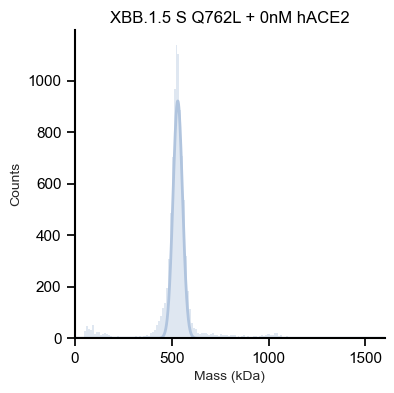

In [16]:
f, ax = plt.subplots(1, figsize=(4,4))
row = df_results1.iloc[12]
plotfit(label=row['label'],
        counts=row['counts'], 
        hbins=row['hbins'], 
        gmm=row['gmm'], 
        x_axis=row['x_axis'], 
        y_axes=row['y_axes'], 
        hmin=row['hmin'], 
        hmax=row['hmax'], 
        run=row['run'], 
        mean=row['mean'],
        weights=row['weights'], 
        ax=ax)
# base_directory = r'C:\Users\jackt\Documents\Notebooks'
# file_name = 'histogram3.svg'
# output_file_name = os.path.join(base_directory, file_name)

#print(output_file_name)
#f.savefig(output_file_name, dpi=600)
   

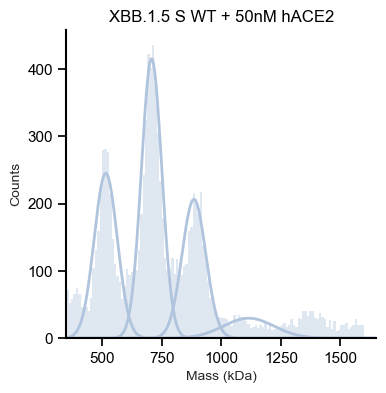

In [17]:
f, ax = plt.subplots(1, figsize=(4,4))
row = df_results2.iloc[2]
plotfit(label=row['label'],
        counts=row['counts'], 
        hbins=row['hbins'], 
        gmm=row['gmm'], 
        x_axis=row['x_axis'], 
        y_axes=row['y_axes'], 
        hmin=row['hmin'], 
        hmax=row['hmax'], 
        run=row['run'], 
        mean=row['mean'],
        weights=row['weights'], 
        ax=ax)
# base_directory = r'C:\Users\jackt\Documents\Notebooks'
# file_name = 'histogram4.svg'
# output_file_name = os.path.join(base_directory, file_name)

# print(output_file_name)
# f.savefig(output_file_name, dpi=600)

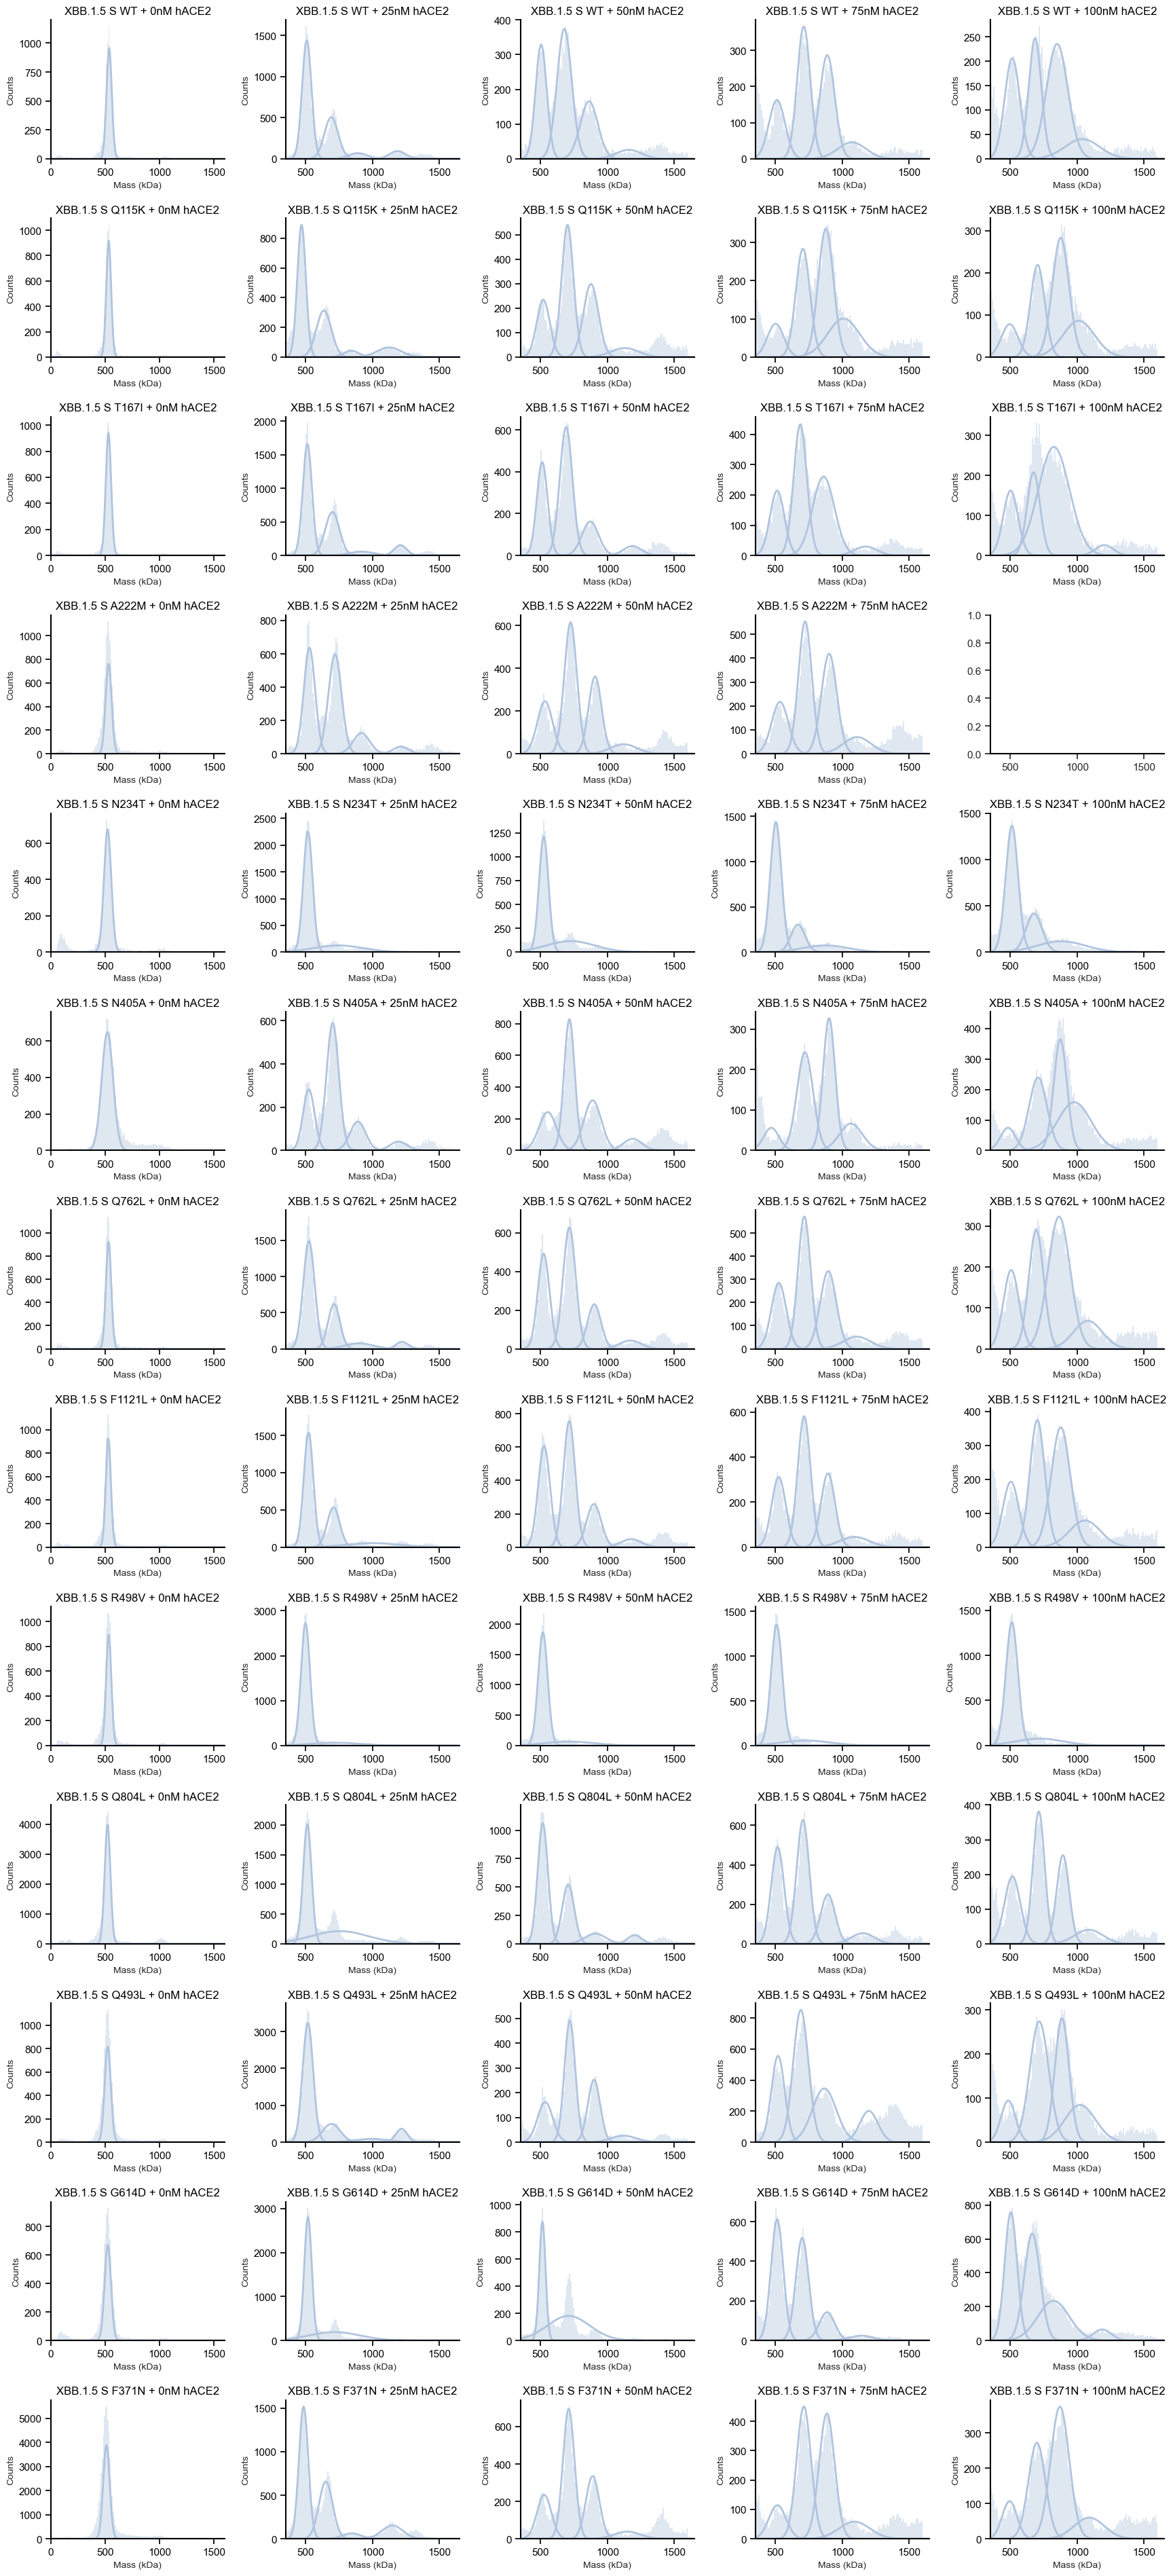

In [46]:
fig, axes = plt.subplots(13, 5, figsize=(17.5, 40))# 5x8 subplot grid1
#fig.suptitle('Replicate 1', fontsize=25)

combined_data = list(zip(sorted_runs1, df_results1.iterrows())) + list(zip(sorted_runs2, df_results2.iterrows()))

for i, (index, data_row) in enumerate(df_results1.iterrows()):
    sr = data_row['run']
    sri = sorted_runs1.index(sr)
    row = sri // 5
    col = sri % 5
    ax = axes[row,col]  # get the current axis object
    data_row = df_results1.loc[i]

    #if data_row['run'] != "g10 100":
    plotfit(label=data_row['label'],
            counts=data_row['counts'], 
            hbins=data_row['hbins'], 
            gmm=data_row['gmm'], 
            x_axis=data_row['x_axis'], 
            y_axes=data_row['y_axes'], 
            hmin=data_row['hmin'], 
            hmax=data_row['hmax'], 
            run=data_row['run'], 
            mean=data_row['mean'],
            weights=data_row['weights'], 
            ax=ax)
    
base_directory = '/Users/jackbrown/Desktop/Notebooks'
file_name = 'XB1 histogram plot.svg'
output_file_name = os.path.join(base_directory, file_name)

#print(output_file_name)
fig.tight_layout(rect=[0, 0.03, 1, 0.985])
fig.savefig(output_file_name, dpi=600)

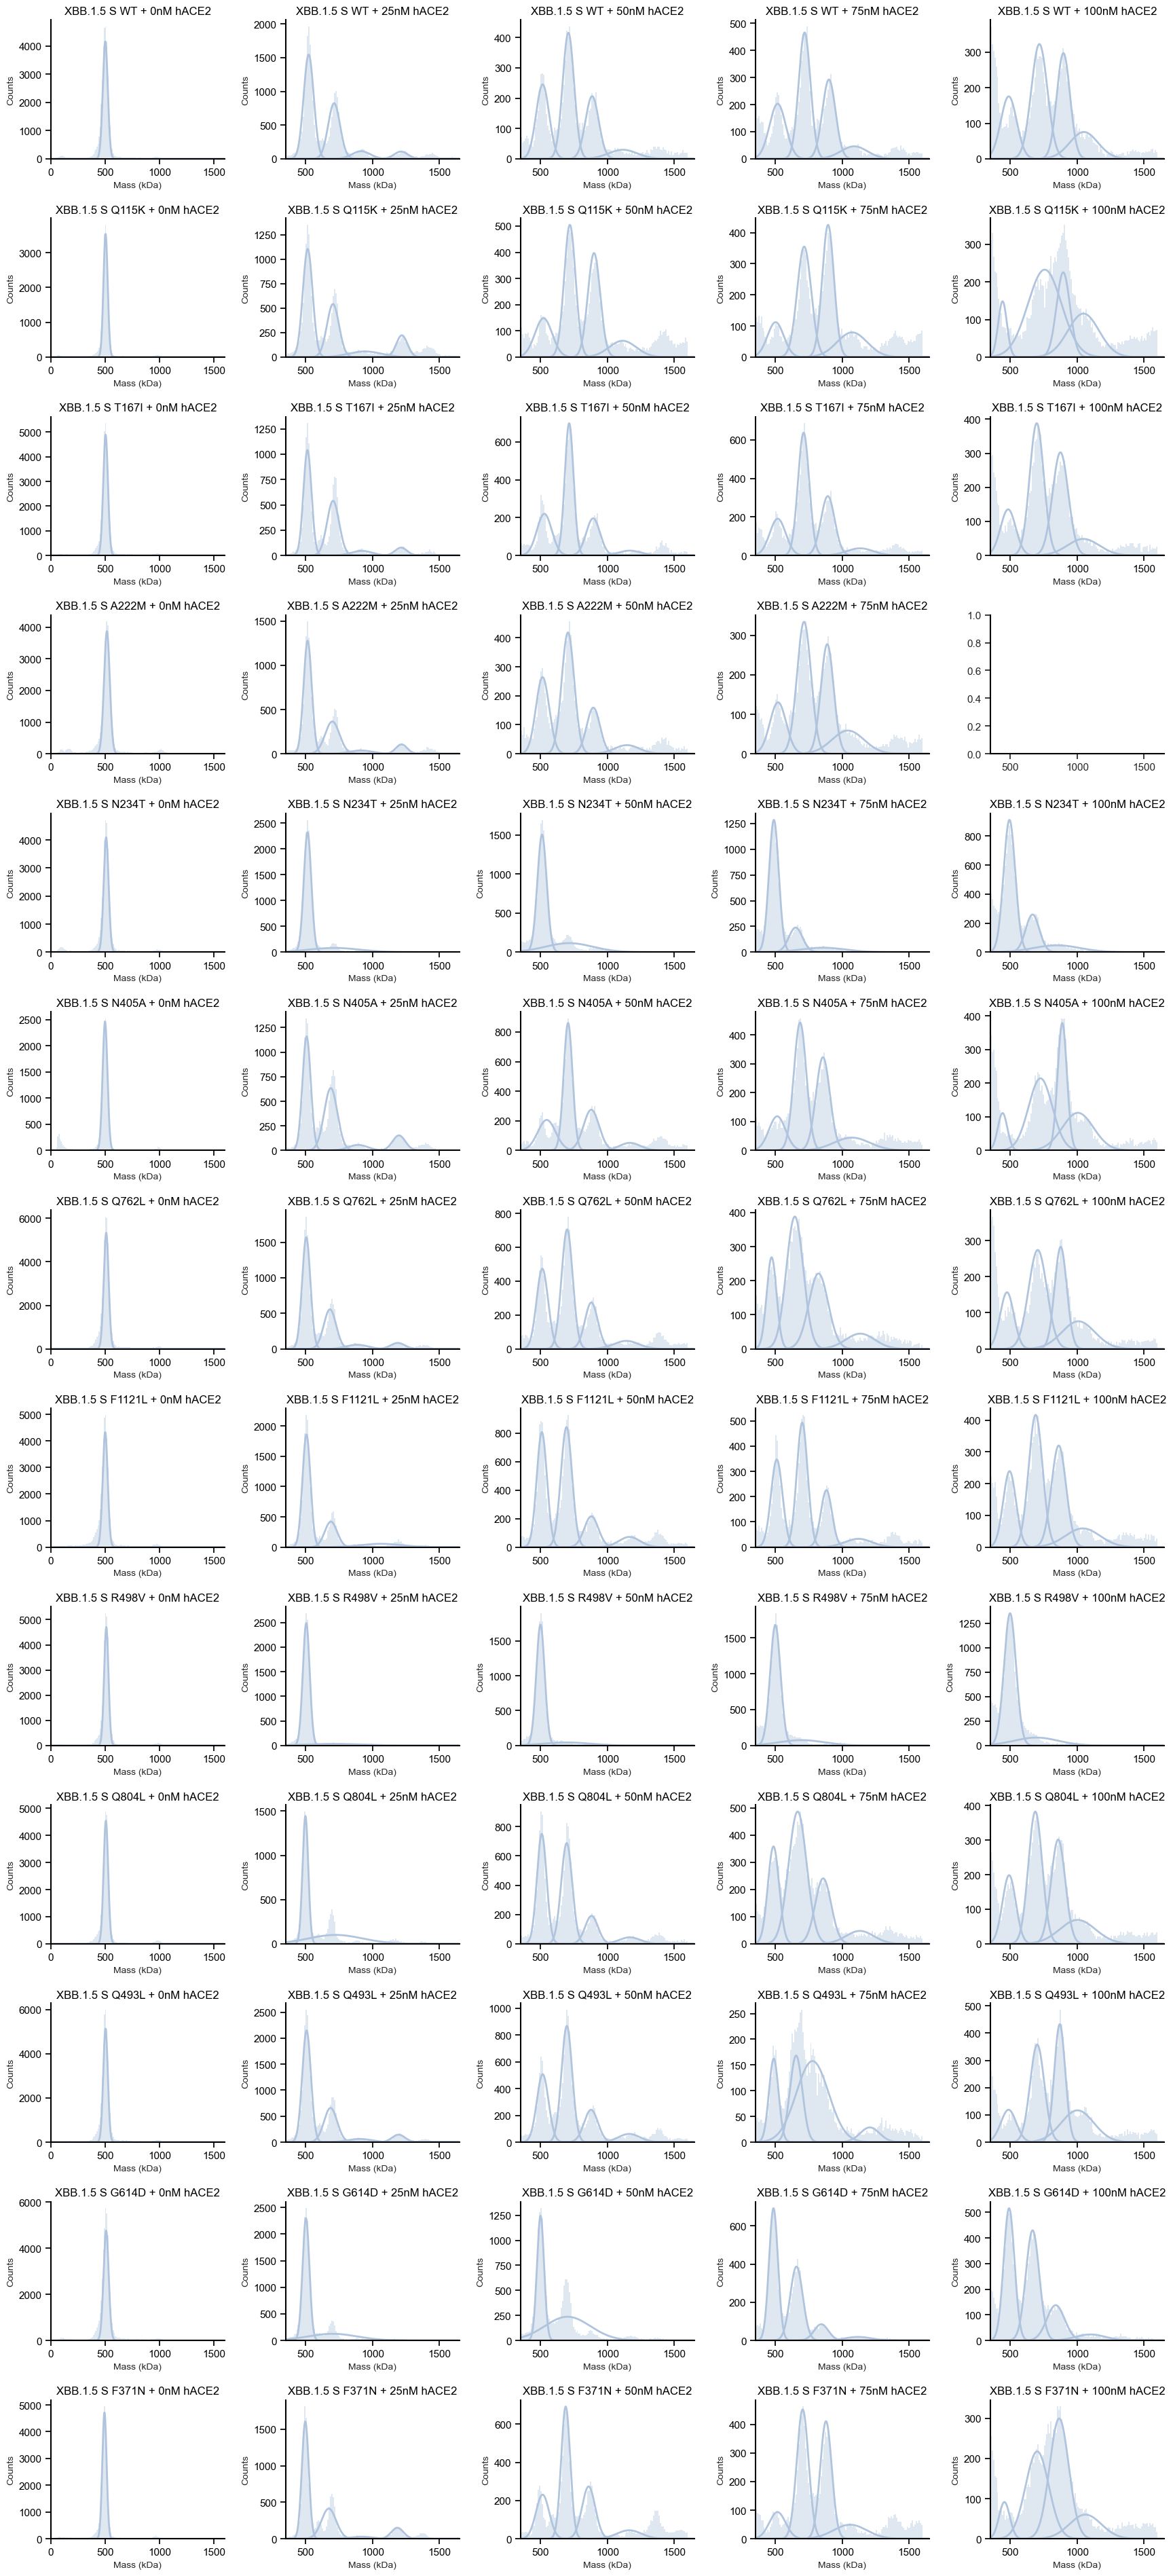

In [47]:
fig, axes = plt.subplots(13, 5, figsize=(17.5, 40))# 5x8 subplot grid1
#fig.suptitle('Replicate 2', fontsize=25)

combined_data = list(zip(sorted_runs1, df_results1.iterrows())) + list(zip(sorted_runs2, df_results2.iterrows()))

for i, (index, data_row) in enumerate(df_results2.iterrows()):
    data_row = df_results2.loc[index]
    sr = data_row['run']
    sri =sorted_runs2.index(sr)
    row = i // 5
    col = i % 5
    ax = axes[row,col]  # get the current axis object
    
    
    plotfit(label=data_row['label'],
            counts=data_row['counts'], 
            hbins=data_row['hbins'], 
            gmm=data_row['gmm'], 
            x_axis=data_row['x_axis'], 
            y_axes=data_row['y_axes'], 
            hmin=data_row['hmin'], 
            hmax=data_row['hmax'], 
            run=data_row['run'], 
            mean=data_row['mean'],
            weights=data_row['weights'], 
            ax=ax)

base_directory = '/Users/jackbrown/Desktop/Notebooks'
file_name = 'XB2 histogram plot.svg'
output_file_name = os.path.join(base_directory, file_name)

#print(output_file_name)
fig.tight_layout(rect=[0, 0.03, 1, 0.985])
fig.savefig(output_file_name, dpi=600)

In [20]:
rmw = pd.DataFrame(run_mean_weight1)

# Explode the mean and weights columns
rmw['mean_weights'] = rmw.apply(lambda x: list(zip(x['mean'], x['weights'])), axis=1)
# Explode zipped column
rmw_exploded = rmw.explode('mean_weights')

# Reset index for further manipulations
rmw_exploded.reset_index(drop=True, inplace=True)

# Assign component number
rmw_exploded[['mean', 'weights']] = pd.DataFrame(rmw_exploded['mean_weights'].tolist(), index=rmw_exploded.index)
# Drop the zipped column
rmw_exploded = rmw_exploded.drop(columns='mean_weights')
rmw_exploded['component'] = rmw_exploded.groupby('run').cumcount() + 1

rmw_exploded['mean'] = rmw_exploded['mean'].apply(lambda x: x[0] if isinstance(x, list) else x)

# Define the bins and labels
bins = [400, 600, 800, 1000, 1200]
labels = ['Unbound', '1 ACE2', '2 ACE2', '3 ACE2']

 # Classify each row by the 'mean' value
rmw_exploded['bin_category'] = pd.cut(rmw_exploded['mean'], bins=bins, labels=labels, right=True)

# Group by 'run' and 'bin_category', then aggregate to sum the weights
grouped = rmw_exploded.groupby(['run', 'bin_category'], observed=True)['weights'].sum().reset_index()

# Pivot the table to have 'runs' as index, binned ranges as columns, and sum of weights as values
weighbin1 = grouped.pivot(index='run', columns='bin_category', values='weights').fillna(0)

print(weighbin1)

bin_category   Unbound    1 ACE2    2 ACE2    3 ACE2
run                                                 
g10 0         0.865005  0.109459  0.000000  0.000000
g10 100       0.113557  0.277582  0.329456  0.279405
g10 25        0.406307  0.440249  0.116030  0.000000
g10 50        0.215393  0.445870  0.270746  0.067991
g10 75        0.187022  0.379319  0.333800  0.099859
...                ...       ...       ...       ...
g9 0          0.925641  0.000000  0.033950  0.000000
g9 100        0.170286  0.192345  0.604310  0.000000
g9 25         0.550104  0.330907  0.049919  0.000000
g9 50         0.300222  0.482447  0.167149  0.050182
g9 75         0.203492  0.376114  0.376900  0.043494

[65 rows x 4 columns]


In [21]:
rmw = pd.DataFrame(run_mean_weight2)

# Explode the mean and weights columns
rmw['mean_weights'] = rmw.apply(lambda x: list(zip(x['mean'], x['weights'])), axis=1)
# Explode zipped column
rmw_exploded = rmw.explode('mean_weights')

# Reset index for further manipulations
rmw_exploded.reset_index(drop=True, inplace=True)

# Assign component number
rmw_exploded[['mean', 'weights']] = pd.DataFrame(rmw_exploded['mean_weights'].tolist(), index=rmw_exploded.index)
# Drop the zipped column
rmw_exploded = rmw_exploded.drop(columns='mean_weights')
rmw_exploded['component'] = rmw_exploded.groupby('run').cumcount() + 1

rmw_exploded['mean'] = rmw_exploded['mean'].apply(lambda x: x[0] if isinstance(x, list) else x)

# Define the bins and labels
bins = [400, 600, 800, 1000, 1200]
labels = ['Unbound', '1 ACE2', '2 ACE2', '3 ACE2']

 # Classify each row by the 'mean' value
rmw_exploded['bin_category'] = pd.cut(rmw_exploded['mean'], bins=bins, labels=labels, right=True)

# Group by 'run' and 'bin_category', then aggregate to sum the weights
grouped = rmw_exploded.groupby(['run', 'bin_category'], observed=True)['weights'].sum().reset_index()

# Pivot the table to have 'runs' as index, binned ranges as columns, and sum of weights as values
weighbin2 = grouped.pivot(index='run', columns='bin_category', values='weights').fillna(0)

print(weighbin2)

bin_category   Unbound    1 ACE2    2 ACE2    3 ACE2
run                                                 
g10 0         0.898934  0.000000  0.051408  0.000000
g10 100       0.138734  0.311432  0.307980  0.241854
g10 25        0.587781  0.295764  0.048909  0.000000
g10 50        0.301464  0.452496  0.182474  0.063566
g10 75        0.173665  0.382816  0.289343  0.154176
...                ...       ...       ...       ...
g9 0          0.931612  0.000000  0.051279  0.000000
g9 100        0.148422  0.395273  0.344338  0.111967
g9 25         0.500572  0.389363  0.055149  0.000000
g9 50         0.258751  0.481892  0.214603  0.044754
g9 75         0.197749  0.464029  0.274655  0.063566

[65 rows x 4 columns]


In [22]:
spike_values = []
for run in order:
    spike_value = MutMap[run]
    spike_values.append(spike_value)
    
ACE2_order = ["0nM hACE2", "25nM hACE2", "50nM hACE2", "75nM hACE2", "100nM hACE2"]

foccsT = pd.DataFrame(columns=spike_values)
foccs1 = pd.DataFrame(columns=spike_values)
foccs2 = pd.DataFrame(columns=spike_values)
foccs3 = pd.DataFrame(columns=spike_values)

for run in weighbin1.index:
    S, A = protein(run)
    A=A+'nM hACE2'
    
    NoACE2 = weighbin1.loc[run, 'Unbound']
    OneACE = weighbin1.loc[run, '1 ACE2']
    TwoACE = weighbin1.loc[run, '2 ACE2']
    ThrACE = weighbin1.loc[run, '3 ACE2']
    TotalSpike = NoACE2+OneACE+TwoACE+ThrACE
    
    fpctoccT = (OneACE + 2*TwoACE + 3*ThrACE) / (TotalSpike*3)
    foccsT.at[A,S] = fpctoccT

    fpctocc1 =  (OneACE + TwoACE + ThrACE) / (TotalSpike)
    foccs1.at[A,S] = fpctocc1
    
    fpctocc2 =  TwoACE + ThrACE / (TotalSpike)
    foccs2.at[A,S] = fpctocc2

    fpctocc3 =ThrACE / (TotalSpike)
    foccs3.at[A,S] = fpctocc3

duplicate_columns = foccsT.columns.duplicated()
duplicate_index = foccsT.index.duplicated()


foccsT = foccsT.reindex(index=ACE2_order, columns=spike_values)
foccs1 = foccs1.reindex(index=ACE2_order, columns=spike_values)
foccs2 = foccs2.reindex(index=ACE2_order, columns=spike_values)
foccs3 = foccs3.reindex(index=ACE2_order, columns=spike_values)


file_name1 = str("XB1 OCCT.csv")
file_name2 = str("XB1 OCC2.csv")
file_name3 = str("XB1 OCC1.csv")
file_name4 =str("XB1 OCC3.CSV")

base_directory = '/Users/jackbrown/Desktop/Notebooks'
output_file_name1 = os.path.join(base_directory, file_name1)
output_file_name2 = os.path.join(base_directory, file_name2)
output_file_name3 = os.path.join(base_directory, file_name3)

# output_file_name2 = os.path.join(os.path.expanduser("~"), "Documents", output_file_name2)
# output_file_name3 = os.path.join(os.path.expanduser("~"), "Documents", output_file_name3)


foccsT.loc['0nM hACE2'] = 0
foccsT = foccsT.rename(columns={'': 'XBB.1.5 S'})
foccs1.loc['0nM hACE2'] = 0
foccs1 = foccs1.rename(columns={'': 'XBB.1.5 S'})
foccs2.loc['0nM hACE2'] = 0
foccs2 = foccs2.rename(columns={'': 'XBB.1.5 S'})
foccs3.loc['0nM hACE2'] = 0
foccs3 = foccs3.rename(columns={'': 'XBB.1.5 S'})


foccsT.to_csv(output_file_name1)
foccs2.to_csv(output_file_name2)
foccs1.to_csv(output_file_name3)
print(foccs3)

                   WT     Q115K     T167I     A222M N234T     N405A A570D  \
0nM hACE2           0         0         0         0     0         0     0   
25nM hACE2   0.063965  0.108042       0.0       0.0   0.0  0.052316   NaN   
50nM hACE2   0.050247  0.068094  0.050182  0.067991   0.0   0.06868   NaN   
75nM hACE2   0.097975  0.234393  0.043494  0.099859   0.0  0.148596   NaN   
100nM hACE2  0.110154  0.230267       0.0  0.279405   0.0       0.0   NaN   

                Q762L    F1121L R498V     Q804L     Q493L     G614D     F371N  
0nM hACE2           0         0     0         0         0         0         0  
25nM hACE2        0.0  0.117294   0.0       0.0       0.0       0.0  0.115698  
50nM hACE2   0.051917  0.046389   0.0       0.0  0.056826       0.0   0.05872  
75nM hACE2   0.078192  0.074905   0.0  0.064324  0.112216  0.034198  0.106635  
100nM hACE2  0.119003  0.137187   0.0  0.095009   0.19777  0.041832  0.120936  


In [23]:
 for run in weighbin2.index:
    if run in weighbin2.index:   
        ACE2_order = ["0nM hACE2", "25nM hACE2", "50nM hACE2", "75nM hACE2", "100nM hACE2"]

        foccsTB = pd.DataFrame(columns=spike_values)
        foccs1B = pd.DataFrame(columns=spike_values)
        foccs2B = pd.DataFrame(columns=spike_values)
        foccs3B = pd.DataFrame(columns=spike_values)
        
        for run in weighbin1.index:
            S, A = protein(run)
            A=A+'nM hACE2'

            NoACE2 = weighbin2.loc[run, 'Unbound']
            OneACE = weighbin2.loc[run, '1 ACE2']
            TwoACE = weighbin2.loc[run, '2 ACE2']
            ThrACE = weighbin2.loc[run, '3 ACE2']
            
            TotalSpike = NoACE2+OneACE+TwoACE+ThrACE

            fpctoccTB = (OneACE + 2*TwoACE + 3*ThrACE) / (TotalSpike*3)
            foccsTB.at[A,S] = fpctoccTB

            fpctocc1B =  (OneACE + TwoACE + ThrACE) / (TotalSpike)
            foccs1B.at[A,S] = fpctocc1B
            
            fpctocc2B =  TwoACE + ThrACE / (TotalSpike)
            foccs2B.at[A,S] = fpctocc2B
        
            fpctocc3B =ThrACE / (TotalSpike)
            foccs3B.at[A,S] = fpctocc3B

        # duplicate_columns = foccsT.columns.duplicated()
        # duplicate_index = foccsT.index.duplicated()

        # # Print out duplicates for inspection
        # print("Duplicate Columns:", foccsT.columns[duplicate_columns])
        # print("Duplicate Index:", foccsT.index[duplicate_index])

        
        #print(foccs.to_csv(sep='\t', index=True))
        Intindex = [0, 25, 50, 75, 100]
    else:
        print(f"Invalid index: {run}")
foccsTB = foccsTB.reindex(index=ACE2_order, columns=spike_values)
foccs1B = foccs1B.reindex(index=ACE2_order, columns=spike_values)
foccs2B = foccs2B.reindex(index=ACE2_order, columns=spike_values)
foccs3B = foccs3B.reindex(index=ACE2_order, columns=spike_values)

file_name1 = str("XB2 OCCT.csv")
file_name2 = str("XB2 OCC2.csv")
file_name3 = str("XB2 OCC1.csv")
file_name4 = str("XB2 OCC3.csv")

base_directory = '/Users/jackbrown/Desktop/Notebooks'
output_file_name1 = os.path.join(base_directory, file_name1)
output_file_name2 = os.path.join(base_directory, file_name2)
output_file_name3 = os.path.join(base_directory, file_name3)
output_file_name4 = os.path.join(base_directory, file_name4)

# output_file_name2 = os.path.join(os.path.expanduser("~"), "Documents", output_file_name2)
# output_file_name3 = os.path.join(os.path.expanduser("~"), "Documents", output_file_name3)


foccsTB.loc['0nM hACE2'] = 0
foccsTB = foccsTB.rename(columns={'': 'XBB.1.5 S'})
foccs1B.loc['0nM hACE2'] = 0
foccs1B = foccs1B.rename(columns={'': 'XBB.1.5 S'})
foccs2B.loc['0nM hACE2'] = 0
foccs2B = foccs2B.rename(columns={'': 'XBB.1.5 S'})
foccs3B.loc['0nM hACE2'] = 0
foccs3B = foccs3B.rename(columns={'': 'XBB.1.5 S'})


foccsTB.to_csv(output_file_name1)
foccs2B.to_csv(output_file_name2)
foccs1B.to_csv(output_file_name3)
foccs3B.to_csv(output_file_name4)
print(foccs3B)
        

                   WT     Q115K     T167I     A222M N234T     N405A A570D  \
0nM hACE2           0         0         0         0     0         0     0   
25nM hACE2        0.0       0.0       0.0       0.0   0.0  0.092875   NaN   
50nM hACE2   0.073577  0.113143  0.044754  0.063566   0.0  0.064551   NaN   
75nM hACE2   0.088128   0.16868  0.063566  0.154176   0.0  0.117037   NaN   
100nM hACE2  0.151251  0.229012  0.111967  0.241854   0.0  0.265542   NaN   

                Q762L    F1121L R498V     Q804L     Q493L     G614D     F371N  
0nM hACE2           0         0     0         0         0         0         0  
25nM hACE2   0.051898  0.100049   0.0       0.0   0.06062       0.0  0.094394  
50nM hACE2   0.063637  0.068207   0.0  0.050451  0.065946       0.0   0.07814  
75nM hACE2   0.086993  0.069343   0.0  0.072957       0.0  0.038209   0.12375  
100nM hACE2  0.192168  0.130483   0.0  0.168151  0.247466  0.047992  0.140574  


In [24]:
combined_focc1 = pd.concat([foccs1, foccs1B])
combined_focc1 = combined_focc1.drop(['A570D'], axis=1)

#print(combined_focc1)
mean_focc1 = combined_focc1.groupby(combined_focc1.index).mean()
sem_focc1 = combined_focc1.groupby(combined_focc1.index).sem()

mean_focc1 = mean_focc1.reindex(index=ACE2_order)
mean_focc1.index = Intindex
sem_focc1 = sem_focc1.reindex(index=ACE2_order)
sem_focc1.index = Intindex
print(mean_focc1)
print(sem_focc1)

           WT     Q115K     T167I     A222M     N234T     N405A     Q762L  \
0         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
25   0.425889  0.457062  0.439711  0.473771  0.208627  0.648533  0.385255   
50   0.717705  0.812016  0.720513  0.741571  0.303786  0.784202  0.685755   
75   0.780167  0.883751   0.79938  0.819657  0.306037  0.885892  0.794728   
100  0.777558  0.904637  0.837735  0.873854  0.384107  0.923845  0.826928   

       F1121L     R498V     Q804L     Q493L     G614D     F371N  
0         0.0       0.0       0.0       0.0       0.0       0.0  
25   0.363965  0.101982  0.406945  0.322806  0.297353  0.460195  
50   0.641612  0.134349  0.515197  0.744147  0.565974  0.792175  
75   0.720074  0.154464  0.723488  0.796672  0.535997  0.884399  
100  0.815972  0.178261  0.780146  0.888849  0.639232  0.911846  
           WT     Q115K     T167I     A222M     N234T     N405A     Q762L  \
0    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000 

In [25]:
combined_foccT = pd.concat([foccsT, foccsTB])
combined_foccT = combined_foccT.drop(['A570D'], axis=1)
#print(combined_focc1)
mean_foccT = combined_foccT.groupby(combined_foccT.index).mean()
sem_foccT = combined_foccT.groupby(combined_foccT.index).sem()

mean_foccT = mean_foccT.reindex(index=ACE2_order)
mean_foccT.index = Intindex
sem_foccT = sem_foccT.reindex(index=ACE2_order)
sem_foccT.index = Intindex
print(mean_foccT)
print(sem_foccT)

           WT     Q115K     T167I     A222M     N234T     N405A     Q762L  \
0         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
25   0.184818  0.212211  0.165233  0.186756  0.069542  0.299235  0.167992   
50   0.358462  0.435981  0.335442  0.366579  0.101262  0.394943  0.329028   
75   0.423532  0.549437  0.410739  0.461754  0.143388  0.503129  0.417462   
100  0.459352  0.553046  0.478119  0.571277  0.181876  0.549665  0.495428   

       F1121L     R498V     Q804L     Q493L     G614D     F371N  
0         0.0       0.0       0.0       0.0       0.0       0.0  
25   0.193769  0.033994  0.135648   0.14629  0.099118  0.235807  
50   0.304811  0.044783  0.227559  0.361676  0.188658  0.397539  
75   0.364303  0.051488  0.354214  0.345911  0.240426  0.496646  
100  0.474309   0.05942  0.441122   0.54617  0.315234  0.538574  
           WT     Q115K     T167I     A222M     N234T     N405A     Q762L  \
0    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000 

In [26]:
combined_focc2 = pd.concat([foccs2, foccs2B])
combined_focc2 = combined_focc2.drop(['A570D'], axis=1)
#print(combined_focc1)
mean_focc2 = combined_focc2.groupby(combined_focc1.index).mean()
sem_focc2 = combined_focc2.groupby(combined_focc1.index).sem()

mean_focc2 = mean_focc2.reindex(index=ACE2_order)
mean_focc2.index = Intindex
sem_focc2 = sem_focc2.reindex(index=ACE2_order)
sem_focc2.index = Intindex
print(mean_focc2)
mean_focc2.to_csv
print(sem_focc2)

           WT     Q115K     T167I     A222M     N234T     N405A     Q762L  \
0         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
25    0.09471   0.11993  0.052534   0.08247       0.0  0.176576  0.091093   
50   0.295767  0.405308  0.238344  0.292388       0.0  0.334011  0.243552   
75   0.397379  0.563025  0.379308  0.438589  0.124128   0.49068  0.375067   
100  0.469794  0.524862  0.530308  0.579347  0.161522   0.59238  0.503771   

       F1121L R498V     Q804L     Q493L     G614D     F371N  
0         0.0   0.0       0.0       0.0       0.0       0.0  
25   0.108672   0.0       0.0  0.083116       0.0   0.14218  
50   0.215521   0.0  0.139655  0.279495       0.0  0.332013  
75   0.300713   0.0  0.270513  0.184952  0.149079  0.490347  
100   0.47312   0.0  0.411639  0.527042  0.261557  0.573123  
           WT     Q115K     T167I     A222M     N234T     N405A     Q762L  \
0    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
25   0.0244

In [27]:
combined_focc3 = pd.concat([foccs3, foccs3B])
combined_focc3 = combined_focc3.drop(['A570D'], axis=1)
#print(combined_focc1)
mean_focc3 = combined_focc3.groupby(combined_focc1.index).mean()
sem_focc3 = combined_focc3.groupby(combined_focc1.index).sem()

mean_focc3 = mean_focc3.reindex(index=ACE2_order)
mean_focc3.index = Intindex
sem_focc3 = sem_focc3.reindex(index=ACE2_order)
sem_focc3.index = Intindex
print(mean_focc3)
print(sem_focc3)

           WT     Q115K     T167I     A222M N234T     N405A     Q762L  \
0         0.0       0.0       0.0       0.0   0.0       0.0       0.0   
25   0.031983  0.054021       0.0       0.0   0.0  0.072596  0.025949   
50   0.061912  0.090618  0.047468  0.065778   0.0  0.066616  0.057777   
75   0.093052  0.201536   0.05353  0.127017   0.0  0.132817  0.082592   
100  0.130702  0.229639  0.055983   0.26063   0.0  0.132771  0.155585   

       F1121L R498V     Q804L     Q493L     G614D     F371N  
0         0.0   0.0       0.0       0.0       0.0       0.0  
25   0.108672   0.0       0.0   0.03031       0.0  0.105046  
50   0.057298   0.0  0.025226  0.061386       0.0   0.06843  
75   0.072124   0.0  0.068641  0.056108  0.036203  0.115193  
100  0.133835   0.0   0.13158  0.222618  0.044912  0.130755  
           WT     Q115K     T167I     A222M  N234T     N405A     Q762L  \
0    0.000000  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
25   0.031983  0.054021  0.000000  0.0000

/Users/jackbrown/Desktop/Notebooks/XBBfitplot1.svg


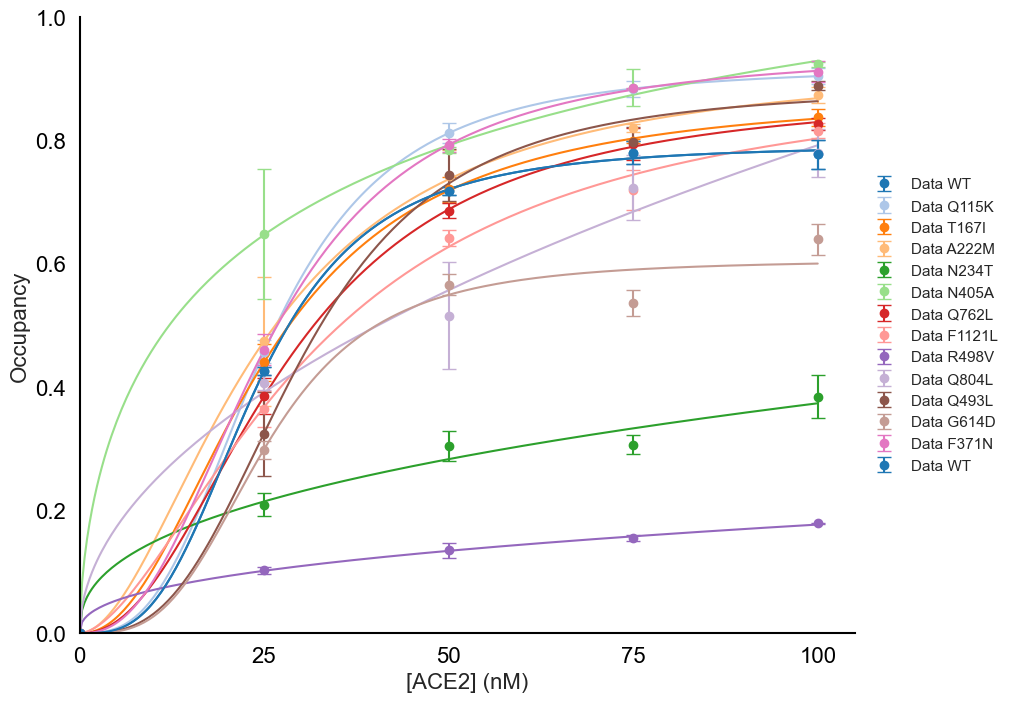

In [28]:
concentration = np.array([0, 25, 50, 75, 100])

# Define the Hill equation
def hill_equation(x, Bmax, Kd, nH):
    epsilon = 1e-10  # Add a small number to avoid division by zero
    return Bmax * x**nH / (Kd**nH + x**nH + epsilon)

# Set up the figure for plotting
plt.figure(figsize=(10, 8))

# Colors for each variant
colors = plt.cm.tab20.colors[:16]

# Loop over each column in the DataFrame to plot
for (variant, color) in zip(mean_focc1.columns, colors):
    occupancy = mean_focc1[variant].values
    errors = sem_focc1[variant].values
    
    # Bounds for curve_fit to ensure parameters are positive
    bounds = (0, [np.inf, np.inf, np.inf])
    # Initial guess for the fitting parameters
    initial_guess = [max(occupancy), np.median(concentration), 1]
    # Fit the Hill equation to the data
    popt, pcov = curve_fit(hill_equation, concentration, occupancy, p0=initial_guess, bounds=bounds, maxfev=10000)
    
    # Plot the error bars for each data point
    plt.errorbar(concentration, occupancy, yerr=errors, fmt='o', label=f'Data {variant}', color=color, capsize=5)
    
    # Generate a smooth line for the fitted curve
    x_smooth = np.linspace(min(concentration), max(concentration), 300)
    y_smooth = hill_equation(x_smooth, *popt)
    
    # Plot the fitted curve
    plt.plot(x_smooth, y_smooth, color=color, label='_nolegend_')
    
first_variant = mean_focc1.columns[0]
first_color = colors[0]
occupancy = mean_focc1[first_variant].values
errors = sem_focc1[first_variant].values

bounds = (0, [np.inf, np.inf, np.inf])
initial_guess = [max(occupancy), np.median(concentration), 1]
popt, pcov = curve_fit(hill_equation, concentration, occupancy, p0=initial_guess, bounds=bounds, maxfev=10000)

plt.errorbar(concentration, occupancy, yerr=errors, fmt='o', capsize=5, label=f'Data {first_variant}', color=first_color)

x_smooth = np.linspace(min(concentration), max(concentration), 300)
y_smooth = hill_equation(x_smooth, *popt)

plt.plot(x_smooth, y_smooth, color=first_color, label='_nolegend_')


# Plot formatting
plt.gca().set_facecolor('white')
plt.xlabel('[ACE2] (nM)', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.grid(True)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlim(0, 105)  # Adjusted the x-limit to match the concentration data
plt.ylim(0, 1)    # Adjusted the y-limit to match the occupancy range
plt.tick_params(colors='black', axis='both', labelsize=16)
plt.xticks([0, 25, 50, 75, 100], ['0', '25', '50', '75', '100'])

# Add the legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
base_directory ='/Users/jackbrown/Desktop/Notebooks'
file_name = 'XBBfitplot1.svg'
output_file_name = os.path.join(base_directory, file_name)
print(output_file_name)
plt.savefig(output_file_name, dpi=1200)
# Show the plot
plt.show()


/Users/jackbrown/Desktop/Notebooks/XBBfitplot2.svg


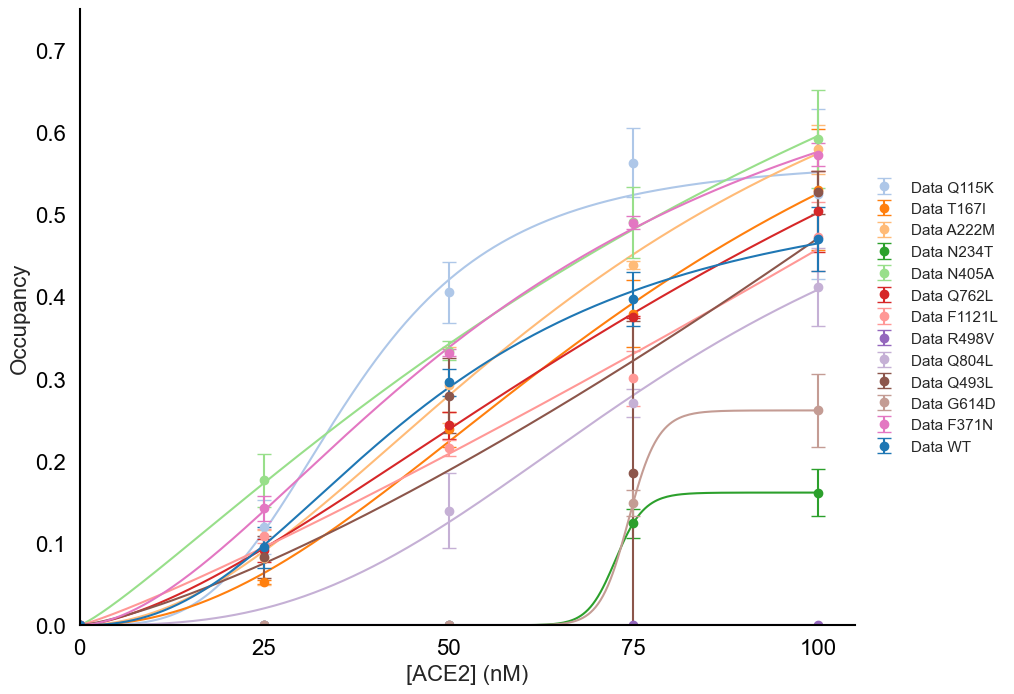

In [29]:
concentration = np.array([0, 25, 50, 75, 100])

# Define the Hill equation
def hill_equation(x, Bmax, Kd, nH):
    epsilon = 1e-10  # Add a small number to avoid division by zero
    return Bmax * x**nH / (Kd**nH + x**nH + epsilon)

# Set up the figure for plotting
plt.figure(figsize=(10, 8))

# Colors for each variant
colors = plt.cm.tab20.colors[:14]

# Loop over each column in the DataFrame to plot
for (variant, color) in zip(mean_focc2.columns[1:], colors[1:]):
    occupancy = mean_focc2[variant].values
    errors = sem_focc2[variant].values
    
    # Bounds for curve_fit to ensure parameters are positive
    bounds = (0, [np.inf, np.inf, np.inf])
    # Initial guess for the fitting parameters
    initial_guess = [max(occupancy), np.median(concentration), 1]
    # Fit the Hill equation to the data
    popt, pcov = curve_fit(hill_equation, concentration, occupancy, p0=initial_guess, bounds=bounds, maxfev=10000)
    
    # Plot the error bars for each data point
    plt.errorbar(concentration, occupancy, yerr=errors, fmt='o', label=f'Data {variant}', color=color, capsize=5)
    
    # Generate a smooth line for the fitted curve
    x_smooth = np.linspace(min(concentration), max(concentration), 300)
    y_smooth = hill_equation(x_smooth, *popt)
    
    # Plot the fitted curve
    plt.plot(x_smooth, y_smooth, color=color, label='_nolegend_')
    
first_variant = mean_focc2.columns[0]
first_color = colors[0]
occupancy = mean_focc2[first_variant].values
errors = sem_focc2[first_variant].values

bounds = (0, [np.inf, np.inf, np.inf])
initial_guess = [max(occupancy), np.median(concentration), 1]
popt, pcov = curve_fit(hill_equation, concentration, occupancy, p0=initial_guess, bounds=bounds, maxfev=10000)

plt.errorbar(concentration, occupancy, yerr=errors, fmt='o', capsize=5, label=f'Data {first_variant}', color=first_color)

x_smooth = np.linspace(min(concentration), max(concentration), 300)
y_smooth = hill_equation(x_smooth, *popt)

plt.plot(x_smooth, y_smooth, color=first_color, label='_nolegend_')


# Plot formatting
plt.gca().set_facecolor('white')
plt.xlabel('[ACE2] (nM)', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.grid(True)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlim(0, 105)  # Adjusted the x-limit to match the concentration data
plt.ylim(0, 0.75)    # Adjusted the y-limit to match the occupancy range
plt.tick_params(colors='black', axis='both', labelsize=16)
plt.xticks([0, 25, 50, 75, 100], ['0', '25', '50', '75', '100'])

# Add the legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

base_directory = '/Users/jackbrown/Desktop/Notebooks'
file_name = 'XBBfitplot2.svg'
output_file_name = os.path.join(base_directory, file_name)
print(output_file_name)
plt.savefig(output_file_name, dpi=1200)

# Show the plot
plt.show()


/Users/jackbrown/Desktop/Notebooks/XBBfitplot3.svg


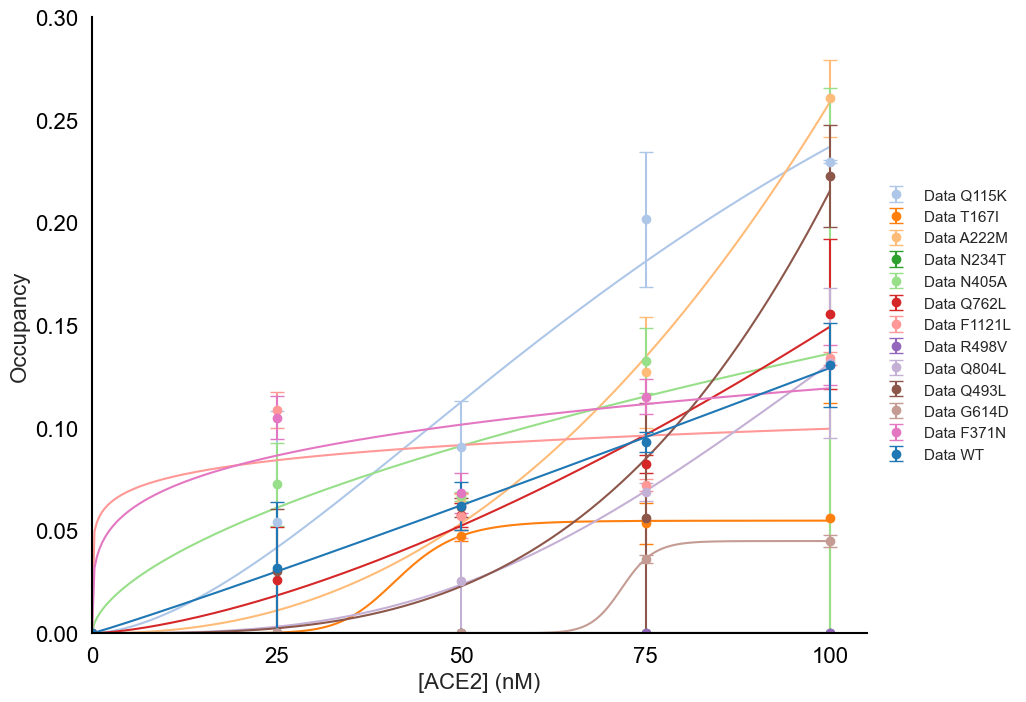

In [30]:
concentration = np.array([0, 25, 50, 75, 100])

# Define the Hill equation
def hill_equation(x, Bmax, Kd, nH):
    epsilon = 1e-10  # Add a small number to avoid division by zero
    return Bmax * x**nH / (Kd**nH + x**nH + epsilon)

# Set up the figure for plotting
plt.figure(figsize=(10, 8))

# Colors for each variant
colors = plt.cm.tab20.colors[:14]

# Loop over each column in the DataFrame to plot
for (variant, color) in zip(mean_focc3.columns[1:], colors[1:]):
    occupancy = mean_focc3[variant].values
    errors = sem_focc3[variant].values
    
    # Bounds for curve_fit to ensure parameters are positive
    bounds = (0, [np.inf, np.inf, np.inf])
    # Initial guess for the fitting parameters
    initial_guess = [max(occupancy), np.median(concentration), 1]
    # Fit the Hill equation to the data
    popt, pcov = curve_fit(hill_equation, concentration, occupancy, p0=initial_guess, bounds=bounds, maxfev=10000)
    
    # Plot the error bars for each data point
    plt.errorbar(concentration, occupancy, yerr=errors, fmt='o', label=f'Data {variant}', color=color, capsize=5)
    
    # Generate a smooth line for the fitted curve
    x_smooth = np.linspace(min(concentration), max(concentration), 300)
    y_smooth = hill_equation(x_smooth, *popt)
    
    # Plot the fitted curve
    plt.plot(x_smooth, y_smooth, color=color, label='_nolegend_')
    
first_variant = mean_focc3.columns[0]
first_color = colors[0]
occupancy = mean_focc3[first_variant].values
errors = sem_focc3[first_variant].values

bounds = (0, [np.inf, np.inf, np.inf])
initial_guess = [max(occupancy), np.median(concentration), 1]
popt, pcov = curve_fit(hill_equation, concentration, occupancy, p0=initial_guess, bounds=bounds, maxfev=10000)

plt.errorbar(concentration, occupancy, yerr=errors, fmt='o', capsize=5, label=f'Data {first_variant}', color=first_color)

x_smooth = np.linspace(min(concentration), max(concentration), 300)
y_smooth = hill_equation(x_smooth, *popt)

plt.plot(x_smooth, y_smooth, color=first_color, label='_nolegend_')


# Plot formatting
plt.gca().set_facecolor('white')
plt.xlabel('[ACE2] (nM)', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.grid(True)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlim(0, 105)  # Adjusted the x-limit to match the concentration data
plt.ylim(0, 0.3)    # Adjusted the y-limit to match the occupancy range
plt.tick_params(colors='black', axis='both', labelsize=16)
plt.xticks([0, 25, 50, 75, 100], ['0', '25', '50', '75', '100'])

# Add the legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

base_directory = '/Users/jackbrown/Desktop/Notebooks'
file_name = 'XBBfitplot3.svg'
output_file_name = os.path.join(base_directory, file_name)
print(output_file_name)
plt.savefig(output_file_name, dpi=1200)

# Show the plot
plt.show()


/Users/jackbrown/Desktop/Notebooks/XBBfitplotT.svg


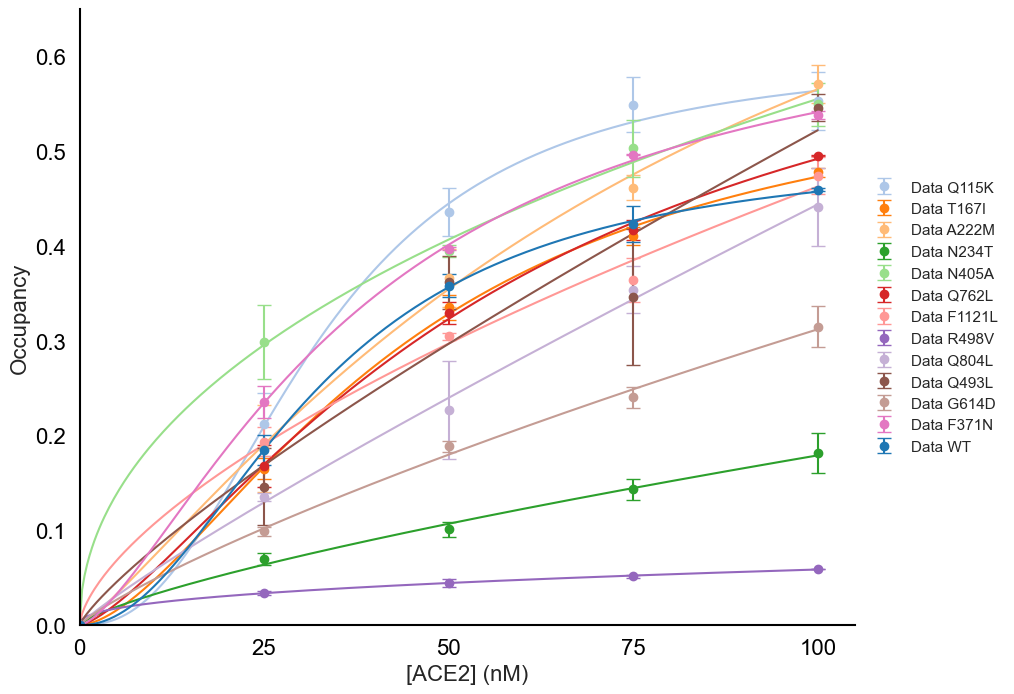

In [31]:
concentration = np.array([0, 25, 50, 75, 100])

# Define the Hill equation
def hill_equation(x, Bmax, Kd, nH):
    epsilon = 1e-10  # Add a small number to avoid division by zero
    return Bmax * x**nH / (Kd**nH + x**nH + epsilon)

# Set up the figure for plotting
plt.figure(figsize=(10, 8))

# Colors for each variant
colors = plt.cm.tab20.colors[:14]

# Loop over each column in the DataFrame to plot
for (variant, color) in zip(mean_foccT.columns[1:], colors[1:]):
    occupancy = mean_foccT[variant].values
    errors = sem_foccT[variant].values
    
    # Bounds for curve_fit to ensure parameters are positive
    bounds = (0, [np.inf, np.inf, np.inf])
    # Initial guess for the fitting parameters
    initial_guess = [max(occupancy), np.median(concentration), 1]
    # Fit the Hill equation to the data
    popt, pcov = curve_fit(hill_equation, concentration, occupancy, p0=initial_guess, bounds=bounds, maxfev=10000)
    
    # Plot the error bars for each data point
    plt.errorbar(concentration, occupancy, yerr=errors, fmt='o', label=f'Data {variant}', color=color, capsize=5)
    
    # Generate a smooth line for the fitted curve
    x_smooth = np.linspace(min(concentration), max(concentration), 300)
    y_smooth = hill_equation(x_smooth, *popt)
    
    # Plot the fitted curve
    plt.plot(x_smooth, y_smooth, color=color, label='_nolegend_')
    
first_variant = mean_foccT.columns[0]
first_color = colors[0]
occupancy = mean_foccT[first_variant].values
errors = sem_foccT[first_variant].values

bounds = (0, [np.inf, np.inf, np.inf])
initial_guess = [max(occupancy), np.median(concentration), 1]
popt, pcov = curve_fit(hill_equation, concentration, occupancy, p0=initial_guess, bounds=bounds, maxfev=10000)

plt.errorbar(concentration, occupancy, yerr=errors, fmt='o', capsize=5, label=f'Data {first_variant}', color=first_color)

x_smooth = np.linspace(min(concentration), max(concentration), 300)
y_smooth = hill_equation(x_smooth, *popt)

plt.plot(x_smooth, y_smooth, color=first_color, label='_nolegend_')


# Plot formatting
plt.gca().set_facecolor('white')
plt.xlabel('[ACE2] (nM)', fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.grid(True)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlim(0, 105)  # Adjusted the x-limit to match the concentration data
plt.ylim(0, 0.65)    # Adjusted the y-limit to match the occupancy range
plt.tick_params(colors='black', axis='both', labelsize=16)
plt.xticks([0, 25, 50, 75, 100], ['0', '25', '50', '75', '100'])

# Add the legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

base_directory = '/Users/jackbrown/Desktop/Notebooks'
file_name = 'XBBfitplotT.svg'
output_file_name = os.path.join(base_directory, file_name)
print(output_file_name)
plt.savefig(output_file_name, dpi=1200)

# Show the plot
plt.show()


TypeError: Axes.errorbar() missing 1 required positional argument: 'y'

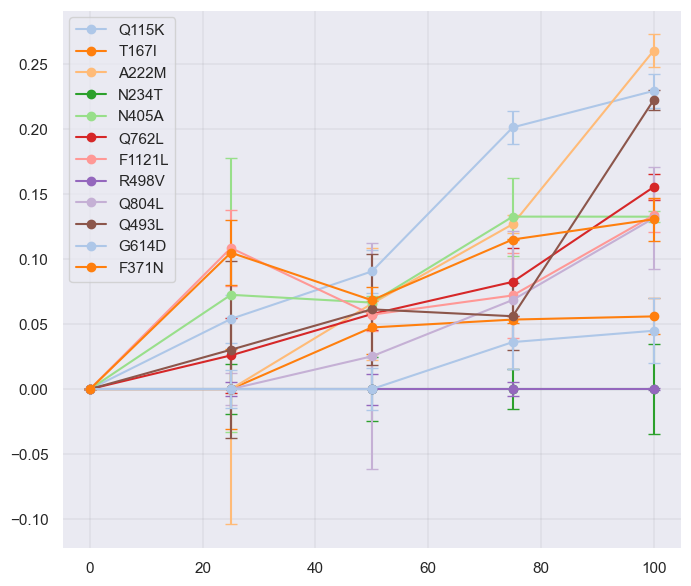

In [32]:

colors = plt.cm.tab20.colors[:11]


ax = mean_focc3.drop(columns=["WT"]).plot(kind='line', figsize=(8,7), marker='o', grid=True, color=colors[1:], yerr=sem_focc1, capsize=4)  # 'o' adds circle markers to the line
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

ax.errorbar(mean_focc3.index, mean_focc3=["WT"], yerr=sem_focc3["WT"], color=colors[0], label="WT", marker='o', linestyle='-', capsize=4, zorder=1000)


ax.set_facecolor('white')  # Set the background color
ax.set_xlabel('[ACE2] (nM)', fontsize=16)
ax.set_ylabel('Occupancy', fontsize=16)
ax.grid(True)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim(0,105)
ax.set_ylim(0,0.95)

ax.tick_params(colors='black')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_xticklabels(['0', '25', '50', '75', '100'])
ax.tick_params(axis='x', labelsize=16) 
ax.tick_params(axis='y', labelsize=16)


legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
legend.get_frame().set_facecolor('white')


# base_directory = r'C:\Users\jackt\Documents\Notebooks'
# file_name = 'lineplot1.svg'
# output_file_name = os.path.join(base_directory, file_name)
# print(output_file_name)
# fig = ax.get_figure()
# fig.set_size_inches(8,7)
# fig.savefig(output_file_name, dpi=1200)

plt.show()

In [ ]:
colors = plt.cm.tab20.colors[:11]


ax = mean_focc2.drop(columns=["BA.2 S"]).plot(kind='line', figsize=(8, 7), marker='o', grid=True, color=colors[1:], yerr=sem_focc1, capsize=4)  # 'o' adds circle markers to the line
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

ax.errorbar(mean_focc2.index, mean_focc2["BA.2 S"], yerr=sem_focc2["BA.2 S"], color=colors[0], label="BA.2 S", marker='o', linestyle='-', capsize=4, zorder=1000)


ax.set_facecolor('white')  # Set the background color
ax.set_xlabel('[ACE2] (nM)', fontsize=16)
ax.set_ylabel('Occupancy', fontsize=16)
ax.grid(True)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim(0,4.05)
ax.set_ylim(0,0.6)

ax.tick_params(colors='black')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(['0', '25', '50', '75', '100'])
ax.tick_params(axis='x', labelsize=16) 
ax.tick_params(axis='y', labelsize=16)

legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
legend.get_frame().set_facecolor('white')

base_directory = r'C:\Users\jackt\Documents\Notebooks'
file_name = 'lineplot2.svg'
output_file_name = os.path.join(base_directory, file_name)
print(output_file_name)
fig = ax.get_figure()
fig.set_size_inches(8,7)
fig.savefig(output_file_name, dpi=1200)

plt.show()

plt.show()

In [ ]:
colors = plt.cm.tab20.colors[:11]


ax = mean_foccT.drop(columns=["BA.2 S"]).plot(kind='line', figsize=(8, 7), marker='o', grid=True, color=colors[1:], yerr=sem_focc1, capsize=4)  # 'o' adds circle markers to the line
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

ax.errorbar(mean_foccT.index, mean_foccT["BA.2 S"], yerr=sem_foccT["BA.2 S"], color=colors[0], label="BA.2 S", marker='o', linestyle='-', capsize=4, zorder=1000)


ax.set_facecolor('white')  # Set the background color
ax.set_xlabel('[ACE2] (nM)', fontsize=16)
ax.set_ylabel('Occupancy', fontsize=16)
ax.grid(True)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim(0,4.05)
ax.set_ylim(0,0.55)

ax.tick_params(colors='black')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xticks([0, 1, 2, 3, 4])

ax.set_xticklabels(['0', '25', '50', '75', '100'], fontsize=12)
ax.tick_params(axis='x', labelsize=16) 
ax.tick_params(axis='y', labelsize=16)

legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
legend.get_frame().set_facecolor('white')

base_directory = r'C:\Users\jackt\Documents\Notebooks'
file_name = 'lineplotT.svg'
output_file_name = os.path.join(base_directory, file_name)
print(output_file_name)
fig = ax.get_figure()
fig.set_size_inches(8,7)
fig.savefig(output_file_name, dpi=1200)

plt.show()

In [ ]:
spike_values = [protein(run)[0] for run in weighbin.index]
print(spike_values)
spike_order = ['Wuhan S-6P (1)', 'Wuhan S-6P (2)', 'BA.2.86 S-6P (1)', 'BA.2.86 S-6P (2)', 'BQ.1.1 S-6P (1)', 'BQ.1.1 S-6P (2)', 'XBB 1.5 S-6P (1)', 'XBB 1.5 S-6P (2)']
ACE2_order = ["0nM hACE2", "25nM hACE2", "50nM hACE2", "75nM hACE2", "100nM hACE2"]

fKD1 = pd.DataFrame(columns=spike_values)
fKD2 = pd.DataFrame(columns=spike_values)

fKD1 = pd.DataFrame()
fKD2 = pd.DataFrame()

epsilon = 1e-10  # a small constant to prevent division by zero

for run in weighbin.index:
    S, A = protein(run)
    A=A+'nM hACE2'
    spike0 = weighbin.loc[run, 'Unbound']
    spike1 = weighbin.loc[run, '1 ACE2']
    spike2 = weighbin.loc[run, '2 ACE2']
    al1 = spike1 + spike2
    tot = spike0 + spike1 + spike2
    
    # Safely compute a1b
    if abs(tot) > epsilon:
        a1b = al1/tot
    else:
        a1b = np.nan

    # Safely compute a2b
    if abs(tot) > epsilon:
        a2b = spike2/tot
    else:
        a2b = np.nan

    # Safely compute a21
    if abs(al1) > epsilon:
        a21 = spike2/al1
    else:
        a21 = np.nan

    ACE2 = int(run.split()[1])
    
    # Safely compute kd1
    denominator1 = 25*a1b + 25*a2b
    if abs(denominator1) > epsilon:
        kd1 = ((25-(25*a1b))*(ACE2-(25*a1b)-(25*a2b)))/denominator1
    else:
        kd1 = np.nan
    
    # Safely compute kd2
    denominator2 = 25*a2b
    if abs(denominator2) > epsilon:
        kd2 = ((25*a1b-25*a2b)*(ACE2-25*a1b-25*a2b))/denominator2
    else:
        kd2 = np.nan
    
    fKD1.at[A, S] = kd1
    fKD2.at[A, S] = kd2

fKD1 = fKD1.reindex(ACE2_order, columns=spike_order)
fKD2 = fKD2.reindex(ACE2_order, columns=spike_order)
print(fKD1,fKD2)

output_file_name1 = str("286 KD1.csv")[3:]
output_file_name2 = str("286 KD2.csv")[3:]
output_file_name1 = os.path.join(os.path.expanduser("~"), "Documents", output_file_name1)
output_file_name2 = os.path.join(os.path.expanduser("~"), "Documents", output_file_name2)

fKD1.to_csv(output_file_name1)
fKD2.to_csv(output_file_name2)

In [ ]:
bins = [400, 600, 800, 1000]

gb = cdf.groupby(["construct", "conc (nM)"])
occs = {}
KD1RBD = {}
KD2RBD = {}
test = {}

for name, group in gb:
    mass_ranges = pd.cut(group['masses_kDa'], bins=bins)
    counts = mass_ranges.value_counts(sort=False)
    # compute % occ for name based on counqts
    pctocc = (counts.iloc[1] + 2*counts.iloc[2]) / (np.sum(counts)*3)
    
    spike0 = counts.iloc[0]
    spike1 = counts.iloc[1]
    spike2 = counts.iloc[2]
    al1 = spike1 + spike2
    tot = spike0 + spike1 + spike2
    a1b = al1/tot
    a2b = spike2/tot
    a21 = spike2/al1
    ace = 'conc (nM)'
    ACE2 = int(name[1])
    
    kd1 = (((25-(25*a1b))*(ACE2-(25*a1b)-(25*a2b)))/(25*a1b+25*a2b))
    kd2 = (((25*a1b)-(25*a2b))*(ACE2-(25*a1b)-(25*a2b)))/(25*a2b)
    occs[name] = pctocc
    test[name] = ((25-(25*a1b)*(ACE2-(25*a1b)-(25*a2b)))/(25*a1b+25*a2b))
    KD1RBD[name] = kd1
    KD2RBD[name] = kd2       


In [ ]:
dfocc = pd.DataFrame([[k[0], k[1], v] for k, v in occs.items()], columns=['construct', 'conc (nM)', 'occ',])
dfocc

In [ ]:
dfKD1 = pd.DataFrame([[k[0], k[1], v] for k, v in KD1RBD.items()], columns=['construct', 'conc (nM)', 'KD1RBD',])
dfKD1

In [ ]:
# Set 'construct' and 'conc (nM)' as the multi-index
dfKD1.set_index(['construct', 'conc (nM)'], inplace=True)

# Define the conc values you want to calculate the average for
conc_values = [25, 50, 75, 100]

# Calculate the average KD1 for each construct and conc value
aveKD1 = dfKD1.loc[(slice(None), conc_values), 'KD1RBD'].groupby('construct').mean()

# Print the average KD1
print(aveKD1)

In [ ]:
dfKD2 = pd.DataFrame([[k[0], k[1], v] for k, v in KD2RBD.items()], columns=['construct', 'conc (nM)', 'KD2RBD',])
dfKD2

In [ ]:
dfKD2.set_index(['construct', 'conc (nM)'], inplace=True)

# Define the conc values you want to calculate the average for
conc_values = [25, 50, 75, 100]

# Calculate the average KD1 for each construct and conc value
aveKD2 = dfKD2.loc[(slice(None), conc_values), 'KD2RBD'].groupby('construct').mean()

# Print the average KD1
print(aveKD2)

In [ ]:
for construct in ['Wu1','286','BQ1','XB1']:
    spike = 25
    ACE2 = [25,50,75,100]
    kd1= aveKD1[construct]
    kd2= aveKD2[construct]
    dfKDocc = pd.DataFrame([[k[0], k[1], v] for k, v in KDocc.items()], columns=['construct', 'ACE2', 'KD1RBD',])


In [ ]:
dfocc.pivot(index='conc (nM)', columns='construct', values='occ')

In [ ]:
pivotKD1 = dfKD1.pivot(index='conc (nM)', columns='construct', values='KD1RBD')
pivotKD1

In [ ]:
dfKD2.pivot(index='conc (nM)', columns='construct', values='KD2RBD')

In [ ]:
sns.lineplot(data=dfocc, x='conc (nM)', y='occ', hue='construct')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Sample data (replace this with your actual data)
data = np.random.normal(loc=500, scale=100, size=1000)

# Create the histogram
plt.figure(figsize=(8, 6))
sns.histplot(data, bins=30, kde=True, color='blue', label='Histogram')

# Fit a Gaussian distribution to the data
mu, std = norm.fit(data)

# Generate the Gaussian curve
x = np.linspace(min(data), max(data), 100)
pdf = norm.pdf(x, mu, std)

# Overlay the Gaussian curve on the histogram
plt.plot(x, pdf * len(data) * np.diff(bins)[0], 'r--', linewidth=2, label='Gaussian Curve')

plt.xlabel('X-axis')
plt.ylabel('Frequency / Probability Density')
plt.title('Histogram with Gaussian Curve Overlay')
plt.legend()
plt.show()


In [ ]:
import matplotlib.font_manager

fonts = set([f.name for f in matplotlib.font_manager.fontManager.ttflist])
for font in sorted(fonts):
    print(font)